In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# %%
# Cargo datos de entrenamiento 
archivo =  '../data/processed/X_train.feather'
X_train = pd.read_feather(archivo )
X_train.drop(['index'],axis=1)
print(X_train.shape)

archivo = '../data/processed/y_train.feather'
y_train = pd.read_feather(archivo )
y_train = y_train['es_desertor']
print(y_train.shape)

# %%
# cargo datos de test 
archivo =  '../data/processed/X_test.feather'
X_test= pd.read_feather(archivo )
X_test.drop(['index'],axis=1)
print(X_test.shape)

archivo = '../data/processed/y_test.feather'
y_test = pd.read_feather(archivo )
y_test = y_test['es_desertor']
print(y_test.shape)

(100794, 95)
(100794,)
(25199, 95)
(25199,)


In [11]:
X_train.columns

Index(['cant_dias_matr', 'cant_periodos_postulaciones', 'sin_beneficios',
       'cae', 'promedio_asistencia', 'promedio_notas', 'ev_diagnostica_2_new',
       'ev_diagnostica_4_new', 'p_asig_riesgo_new', 'veces_accesos_app_new',
       'monto_deuda_new', 'inst_tnemotecnia_I.P.', 'sede_tdesc_APOQUINDO',
       'sede_tdesc_ARICA', 'sede_tdesc_CALAMA', 'sede_tdesc_CHILLÁN',
       'sede_tdesc_CONCEPCIÓN - TALCAHUANO', 'sede_tdesc_COPIAPÓ',
       'sede_tdesc_COYHAIQUE', 'sede_tdesc_CURICÓ', 'sede_tdesc_IQUIQUE',
       'sede_tdesc_LA SERENA', 'sede_tdesc_LOS ÁNGELES',
       'sede_tdesc_La Granja', 'sede_tdesc_MAIPÚ', 'sede_tdesc_OSORNO',
       'sede_tdesc_PUENTE ALTO', 'sede_tdesc_PUERTO MONTT',
       'sede_tdesc_PUNTA ARENAS', 'sede_tdesc_RANCAGUA', 'sede_tdesc_RENCA',
       'sede_tdesc_SANTIAGO CENTRO', 'sede_tdesc_SANTIAGO SUR',
       'sede_tdesc_San Pedro De La Paz', 'sede_tdesc_TALCA',
       'sede_tdesc_TEMUCO', 'sede_tdesc_VALDIVIA', 'sede_tdesc_VALPARAÍSO',
       'sede_tdes

In [3]:
X_test = X_test.drop(['index'],axis=1)
X_train = X_train.drop(['index'],axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

In [5]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00000992e+00  2.99647751e-02 -4.82385397e-02 ...  1.14711493e-02
  -1.02188370e-02  1.42009229e-01]
 [ 2.99647751e-02  1.00000992e+00  1.88280557e-04 ...  3.63951009e-03
  -2.92139730e-03  3.64609680e-02]
 [-4.82385397e-02  1.88280557e-04  1.00000992e+00 ... -2.16520458e-02
   9.33472789e-04  7.53005214e-03]
 ...
 [ 1.14711493e-02  3.63951009e-03 -2.16520458e-02 ...  1.00000992e+00
  -6.04578202e-03 -9.18927813e-02]
 [-1.02188370e-02 -2.92139730e-03  9.33472789e-04 ... -6.04578202e-03
   1.00000992e+00 -2.09900111e-02]
 [ 1.42009229e-01  3.64609680e-02  7.53005214e-03 ... -9.18927813e-02
  -2.09900111e-02  1.00000992e+00]]


In [6]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.20108079  0.11946753 -0.13495559 ... -0.03737388 -0.05007097
   0.01744955]
 [-0.00318966 -0.00597588 -0.00258694 ... -0.13133731 -0.05793301
   0.00947146]
 [-0.12005218 -0.14934812 -0.07746999 ... -0.01194403 -0.02916218
  -0.01296976]
 ...
 [ 0.04526256  0.12893983  0.116757   ...  0.00176698  0.01278209
   0.00277645]
 [ 0.00088277 -0.00148377  0.02467878 ...  0.43584854  0.16989139
  -0.15275209]
 [ 0.31663571 -0.19718932 -0.12794021 ...  0.02269744  0.00454116
  -0.00750813]]

Eigenvalues 
[ 3.21971583e+00  2.97881458e+00  2.65278974e+00  2.54677347e+00
  2.29924787e+00  2.01869078e+00  1.93969331e+00  1.83570257e+00
  1.69506399e+00  1.66640494e+00  4.90638273e-02  1.38227055e-01
  1.12562335e-01  9.18789667e-02  7.49067793e-02  2.02818835e-01
  2.60844046e-01  1.53713968e+00  3.00719078e-01  1.48328324e+00
  1.44562580e+00  1.43068137e+00  3.92423093e-01  4.02414920e-01
  4.49241341e-01  4.65692796e-01  5.13634622e-01  2.35409732e-05
  5.60846379e-01  1.33899

In [7]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
3.2197158327594155
2.9788145833751747
2.652789742380188
2.546773467706786
2.2992478731475647
2.0186907780575405
1.9396933062218789
1.8357025665663513
1.695063989650667
1.666404940746988
1.5371396818340826
1.4832832432306091
1.4456257975598426
1.4306813745450864
1.3389979185921872
1.3184133973362395
1.2667662640315298
1.2372239969108358
1.2020632851672246
1.1857525388281587
1.1633518113422388
1.156058990604238
1.1378991867382642
1.1152944503425597
1.106638273960869
1.0849858835048065
1.0724904556129935
1.0630454124446242
1.0590348376658134
1.0564208673849131
1.0520318058515907
1.0480460097324047
1.0465349405846174
1.0390191879324342
1.036976011832477
1.028288526988546
1.0242021770790783
1.0190543303419914
1.0128017574990076
1.0123007620929527
1.0087132091033837
1.0033188817427976
1.00184836295952
0.9999861640475224
0.9997509080845777
0.9991156754703789
0.998471594971387
0.9960695827907419
0.9948102777738681
0.9936195596151807
0.9919626633685968
0.99003

In [8]:
X_test.shape

(25199, 94)

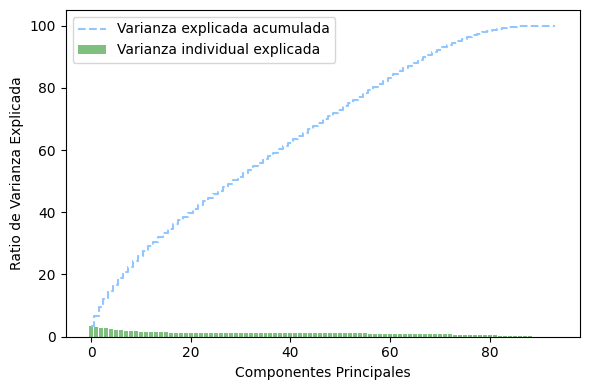

In [10]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(94), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(94), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(95,1),
                      eig_pairs[1][1].reshape(95,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[-4.25903683e-02  8.86162650e-02]
 [-1.75527036e-01  2.52819713e-02]
 [-1.02437984e-01 -1.12270371e-03]
 [ 2.89608090e-04 -1.19568185e-03]
 [ 1.27684669e-01 -8.14586712e-02]
 [-5.39067437e-02 -2.23563821e-02]
 [-1.34487302e-01 -2.57884139e-02]
 [ 3.70113261e-01 -1.10958059e-01]
 [ 4.12817874e-01 -8.54650611e-02]
 [-2.22526331e-01 -2.83966699e-02]
 [-1.01913047e-01 -1.43818908e-01]
 [-3.36400435e-01  1.62578883e-01]
 [-3.95778491e-01  6.15136913e-02]
 [-1.14728592e-01 -4.11358888e-02]
 [ 1.13117196e-01 -8.12853898e-02]
 [-1.14281018e-02  9.73178528e-02]
 [-8.76058656e-02 -1.97650207e-01]
 [ 4.87202312e-02 -3.82429923e-02]
 [ 4.90806608e-02 -1.04512168e-02]
 [-5.98190019e-02  1.27503921e-01]
 [-4.81304925e-03  1.05891849e-01]
 [ 5.62828679e-02 -4.80575587e-02]
 [ 2.79230268e-04 -1.68958985e-02]
 [-2.50437158e-02  9.62708672e-02]
 [ 6.65266599e-02 -2.72685720e-02]
 [ 1.20719498e-02 -5.01887982e-02]
 [-2.44460183e-02  1.35041838e-01]
 [ 1.10639693e-03  5.21959364e-03]
 [-1.0897

In [ ]:
y_train[:]

0        0
1        1
2        0
3        0
4        0
        ..
88190    1
88191    1
88192    1
88193    0
88194    1
Name: es_desertor, Length: 88195, dtype: int64

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [ ]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(X_std)

In [ ]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

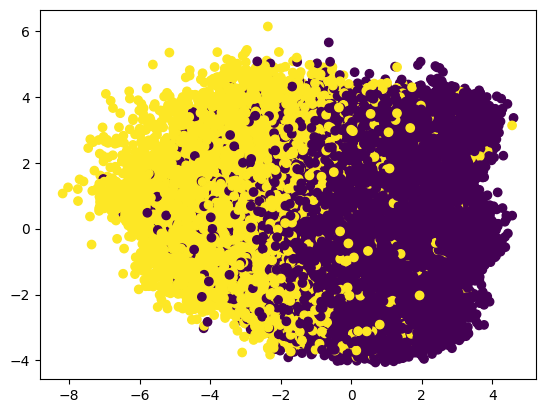

In [ ]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y_train)

In [ ]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_std)

PCA()

Text(0, 0.5, 'Explained variance (%)')

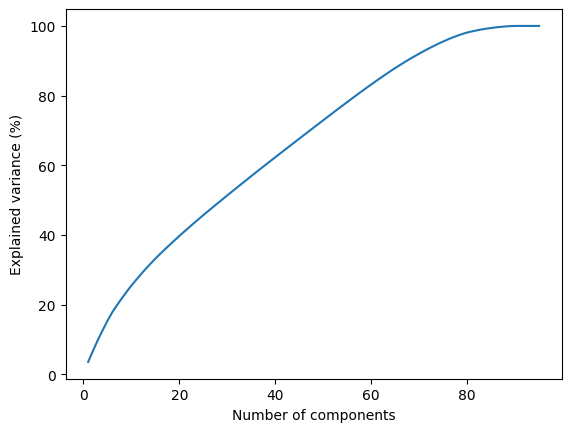

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[ 3.55373065  6.77233662  9.8035209  12.60354574 15.31306945 17.7562809
 19.83578602 21.79233969 23.66239737 25.45077854 27.10150854 28.72068408
 30.28060786 31.7455925  33.20804494 34.55870481 35.8845697  37.17578898
 38.45118027 39.70468331 40.93376923 42.15449638 43.34212741 44.52821042
 45.69336979 46.83698019 47.97664779 49.10984791 50.23706269 51.35884813
 52.4764299  53.58596353 54.69471709 55.79861569 56.89553186 57.98913817
 59.07807059 60.15797294 61.23512714 62.30814026 63.37618964 64.44289393
 65.50873596 66.57332466 67.63654661 68.69811556 69.75927604 70.8171957
 71.87481856 72.92745745 73.97781796 75.02579076 76.07248106 77.11300215
 78.14631575 79.17285315 80.19506971 81.20452399 82.20859855 83.20151337
 84.16643555 85.1258234 ]
Number of components: 62


Text(0, 0.5, 'Explained variance (%)')

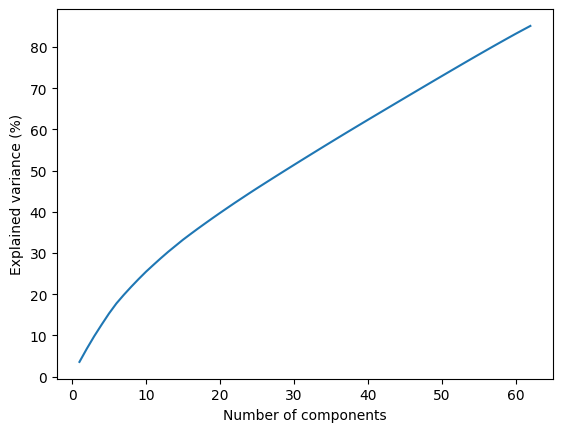

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_std)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)


[[0.04259037 0.17552704 0.10243798 ... 0.05152607 0.00605565 0.21525616]
 [0.08861626 0.02528197 0.0011227  ... 0.08222571 0.00284625 0.2961963 ]
 [0.42972281 0.15064242 0.05276686 ... 0.11756405 0.02504834 0.01362087]
 ...
 [0.02314125 0.01348694 0.02133357 ... 0.05304124 0.01767606 0.01841181]
 [0.01208067 0.02681191 0.05723735 ... 0.03500408 0.25990061 0.06320199]
 [0.00553686 0.12984381 0.19516004 ... 0.01888095 0.15109384 0.08631955]]


In [ ]:
# %%
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {X_train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['asignaturas_con_riesgo_notas', 'promedio_notas_new', 'asignaturas_con_riesgo_asistencia', 'promedio_asistencia_new']
Component 1: ['zona_tdesc_Zona Sur', 'codigo_asignatura_mat_alg_ss_SIN DATOS', 'area_tdesc_Hotelería, Turismo y Gastronomía', 'zona_tdesc_Zona Región Metropolitana']
Component 2: ['anos_ccod', 'veces_accesos_app_new', 'codigo_asignatura_mat_alg_ss_MTAE01', 'ev_diagnostica_4_new']
Component 3: ['zona_tdesc_Zona Norte', 'zona_tdesc_Zona Región Metropolitana', 'sede_tdesc_SANTIAGO CENTRO', 'sede_tdesc_LA SERENA']
Component 4: ['anos_ccod', 'codigo_asignatura_mat_alg_ss_MTIN01', 'veces_accesos_app_new', 'zona_tdesc_Zona Sur']
Component 5: ['codigo_asignatura_mat_alg_ss_MTSL01', 'area_tdesc_Salud', 'area_tdesc_Hotelería, Turismo y Gastronomía', 'codigo_asignatura_mat_alg_ss_SIN DATOS']
Component 6: ['area_tdesc_Agroindustria y Medioambiente', 'codigo_asignatura_mat_alg_ss_MTSV01', 'codigo_asignatura_mat_alg_ss_MTE

In [ ]:
X_pca = pca.transform(X_std)
print(X_pca.shape)
print(X_pca)


(88195, 62)
[[ 1.60506029 -1.53508639  1.73185151 ...  0.31546979  0.37799051
  -1.21747748]
 [ 2.76361828 -0.37961984  1.29994341 ...  0.2645707  -0.54166832
   1.52550635]
 [-2.33079113  2.66680996 -0.7639622  ...  0.99264357  0.03722045
  -0.53826887]
 ...
 [ 5.02482623 -0.36650526 -1.76678229 ...  0.43696371 -0.25652874
   0.12681793]
 [-2.00613801 -3.69039508  0.14408507 ...  0.34226867 -0.44940125
   0.2257559 ]
 [ 2.64957808  1.57285465 -0.70252682 ... -0.17710418  1.16539281
  -0.49793305]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
random_state = 12
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X_train, y_train, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
lr = log_regress_model.fit(X_train,y_train)

/home/vfuentealba/proyectos/desercion/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr.score(X_test,y_test)

0.8978419441399902

In [ ]:
df_coeficientes = pd.DataFrame()
df_coeficientes= pd.DataFrame(list(zip(X_train.columns, _model.coef_.flatten())))


In [ ]:
# %%
df_coeficientes.sort_values(by=[1]) 

,0,1
39,sede_tdesc_TEMUCO,-1.331636
50,"area_tdesc_Electricidad, Electrónica y Telecom...",-0.773066
35,sede_tdesc_SANTIAGO CENTRO,-0.653677
52,"area_tdesc_Hotelería, Turismo y Gastronomía",-0.547301
42,sede_tdesc_Ñuñoa (Ex Pérez Rosales),-0.540516
...,...,...
43,zona_tdesc_Zona Norte,0.592264
34,sede_tdesc_RENCA,0.661825
51,area_tdesc_Energías Renovables y Eficiencia En...,0.723279
48,area_tdesc_Construcción,0.799296


In [ ]:
# %%
print("Intercept:", _model.intercept_)
print("Accuracy de entrenamiento:", lr.score(X_train,y_train))

Intercept: [-2.15567971]
Accuracy de entrenamiento: 0.8999611247894259


In [ ]:
## Genero las predicciones para datos de entrenamiento , test y todas
y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# %%
# Matriz de confusion train 
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


[[20689   623]
 [ 2080  3067]]


In [ ]:
#Metricas
from sklearn.metrics import classification_report

# %%
# Metricas Train
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     21312
           1       0.83      0.60      0.69      5147

    accuracy                           0.90     26459
   macro avg       0.87      0.78      0.82     26459
weighted avg       0.89      0.90      0.89     26459

